In [1]:
import pandas
import pickle
from IPython.display import display
from biotite.sequence.phylo import upgma
from matplotlib import pyplot
from io import StringIO
from Bio import Phylo

In [2]:
data_path = "../../../data"

In [3]:
df = pandas.read_csv(f"{data_path}/final_cluster.csv")

In [4]:
df.describe()

,Right,Total
count,225.000000,225.0
mean,7.937778,14.0
std,6.357339,0.0
min,0.000000,14.0
25%,0.000000,14.0
50%,12.000000,14.0
75%,14.000000,14.0
max,14.000000,14.0


In [5]:
df.sort_values(by=" Right").head(30)

,Algoritm,Name,Family,Right,Total
224,Universal Quality Index,cebus_capucinus_ENSCCAG00000020944.png,orthologs_neuroglobin,0,14
174,Universal Quality Index,rhinopithecus_roxellana_ENSRROG00000038611.png,orthologs_cytoglobin,0,14
175,Universal Quality Index,cebus_capucinus_ENSCCAG00000037088.png,orthologs_cytoglobin,0,14
176,Universal Quality Index,pan_paniscus_ENSPPAG00000043476.png,orthologs_cytoglobin,0,14
177,Universal Quality Index,mandrillus_leucophaeus_ENSMLEG00000043678.png,orthologs_cytoglobin,0,14
178,Universal Quality Index,rhinopithecus_bieti_ENSRBIG00000040278.png,orthologs_cytoglobin,0,14
70,Structural Similarity Index Measure,carlito_syrichta_ENSTSYG00000026821.png,orthologs_neuroglobin,0,14
68,Structural Similarity Index Measure,mandrillus_leucophaeus_ENSMLEG00000035424.png,orthologs_neuroglobin,0,14
143,MultiScale Structural Similarity Index Measure,mandrillus_leucophaeus_ENSMLEG00000035424.png,orthologs_neuroglobin,0,14
179,Universal Quality Index,pongo_abelii_ENSPPYG00000008661.png,orthologs_cytoglobin,0,14


In [6]:
df.columns

Index(['Algoritm', ' Name', ' Family', ' Right', ' Total'], dtype='object')

In [7]:
df[df[" Right"] == df[" Total"]][' Name'].size / df[' Name'].size

0.4

In [8]:
with open(f"{data_path}/cluster_sim.pkl", "rb") as f:
    sim_hash = pickle.load(f)

In [9]:
dfs_all = dict()
for alg, results in sim_hash.items():
    dfs_all[alg] = pandas.DataFrame.from_dict(results)

In [10]:
for df_all in dfs_all.values():
    df_all.columns = [c.split("/")[-3].split(".")[0].split("_")[1] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.columns]
    df_all.index = [c.split("/")[-3].split(".")[0].split("_")[1] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.index]

In [11]:
fixed_dfs_all = {}
numpys_all = {}
for alg, df_all in dfs_all.items():
    fixed_dfs_all[alg] = df_all.sort_index()[sorted(df_all.columns)]
    numpys_all[alg] = fixed_dfs_all[alg].to_numpy(na_value=0)

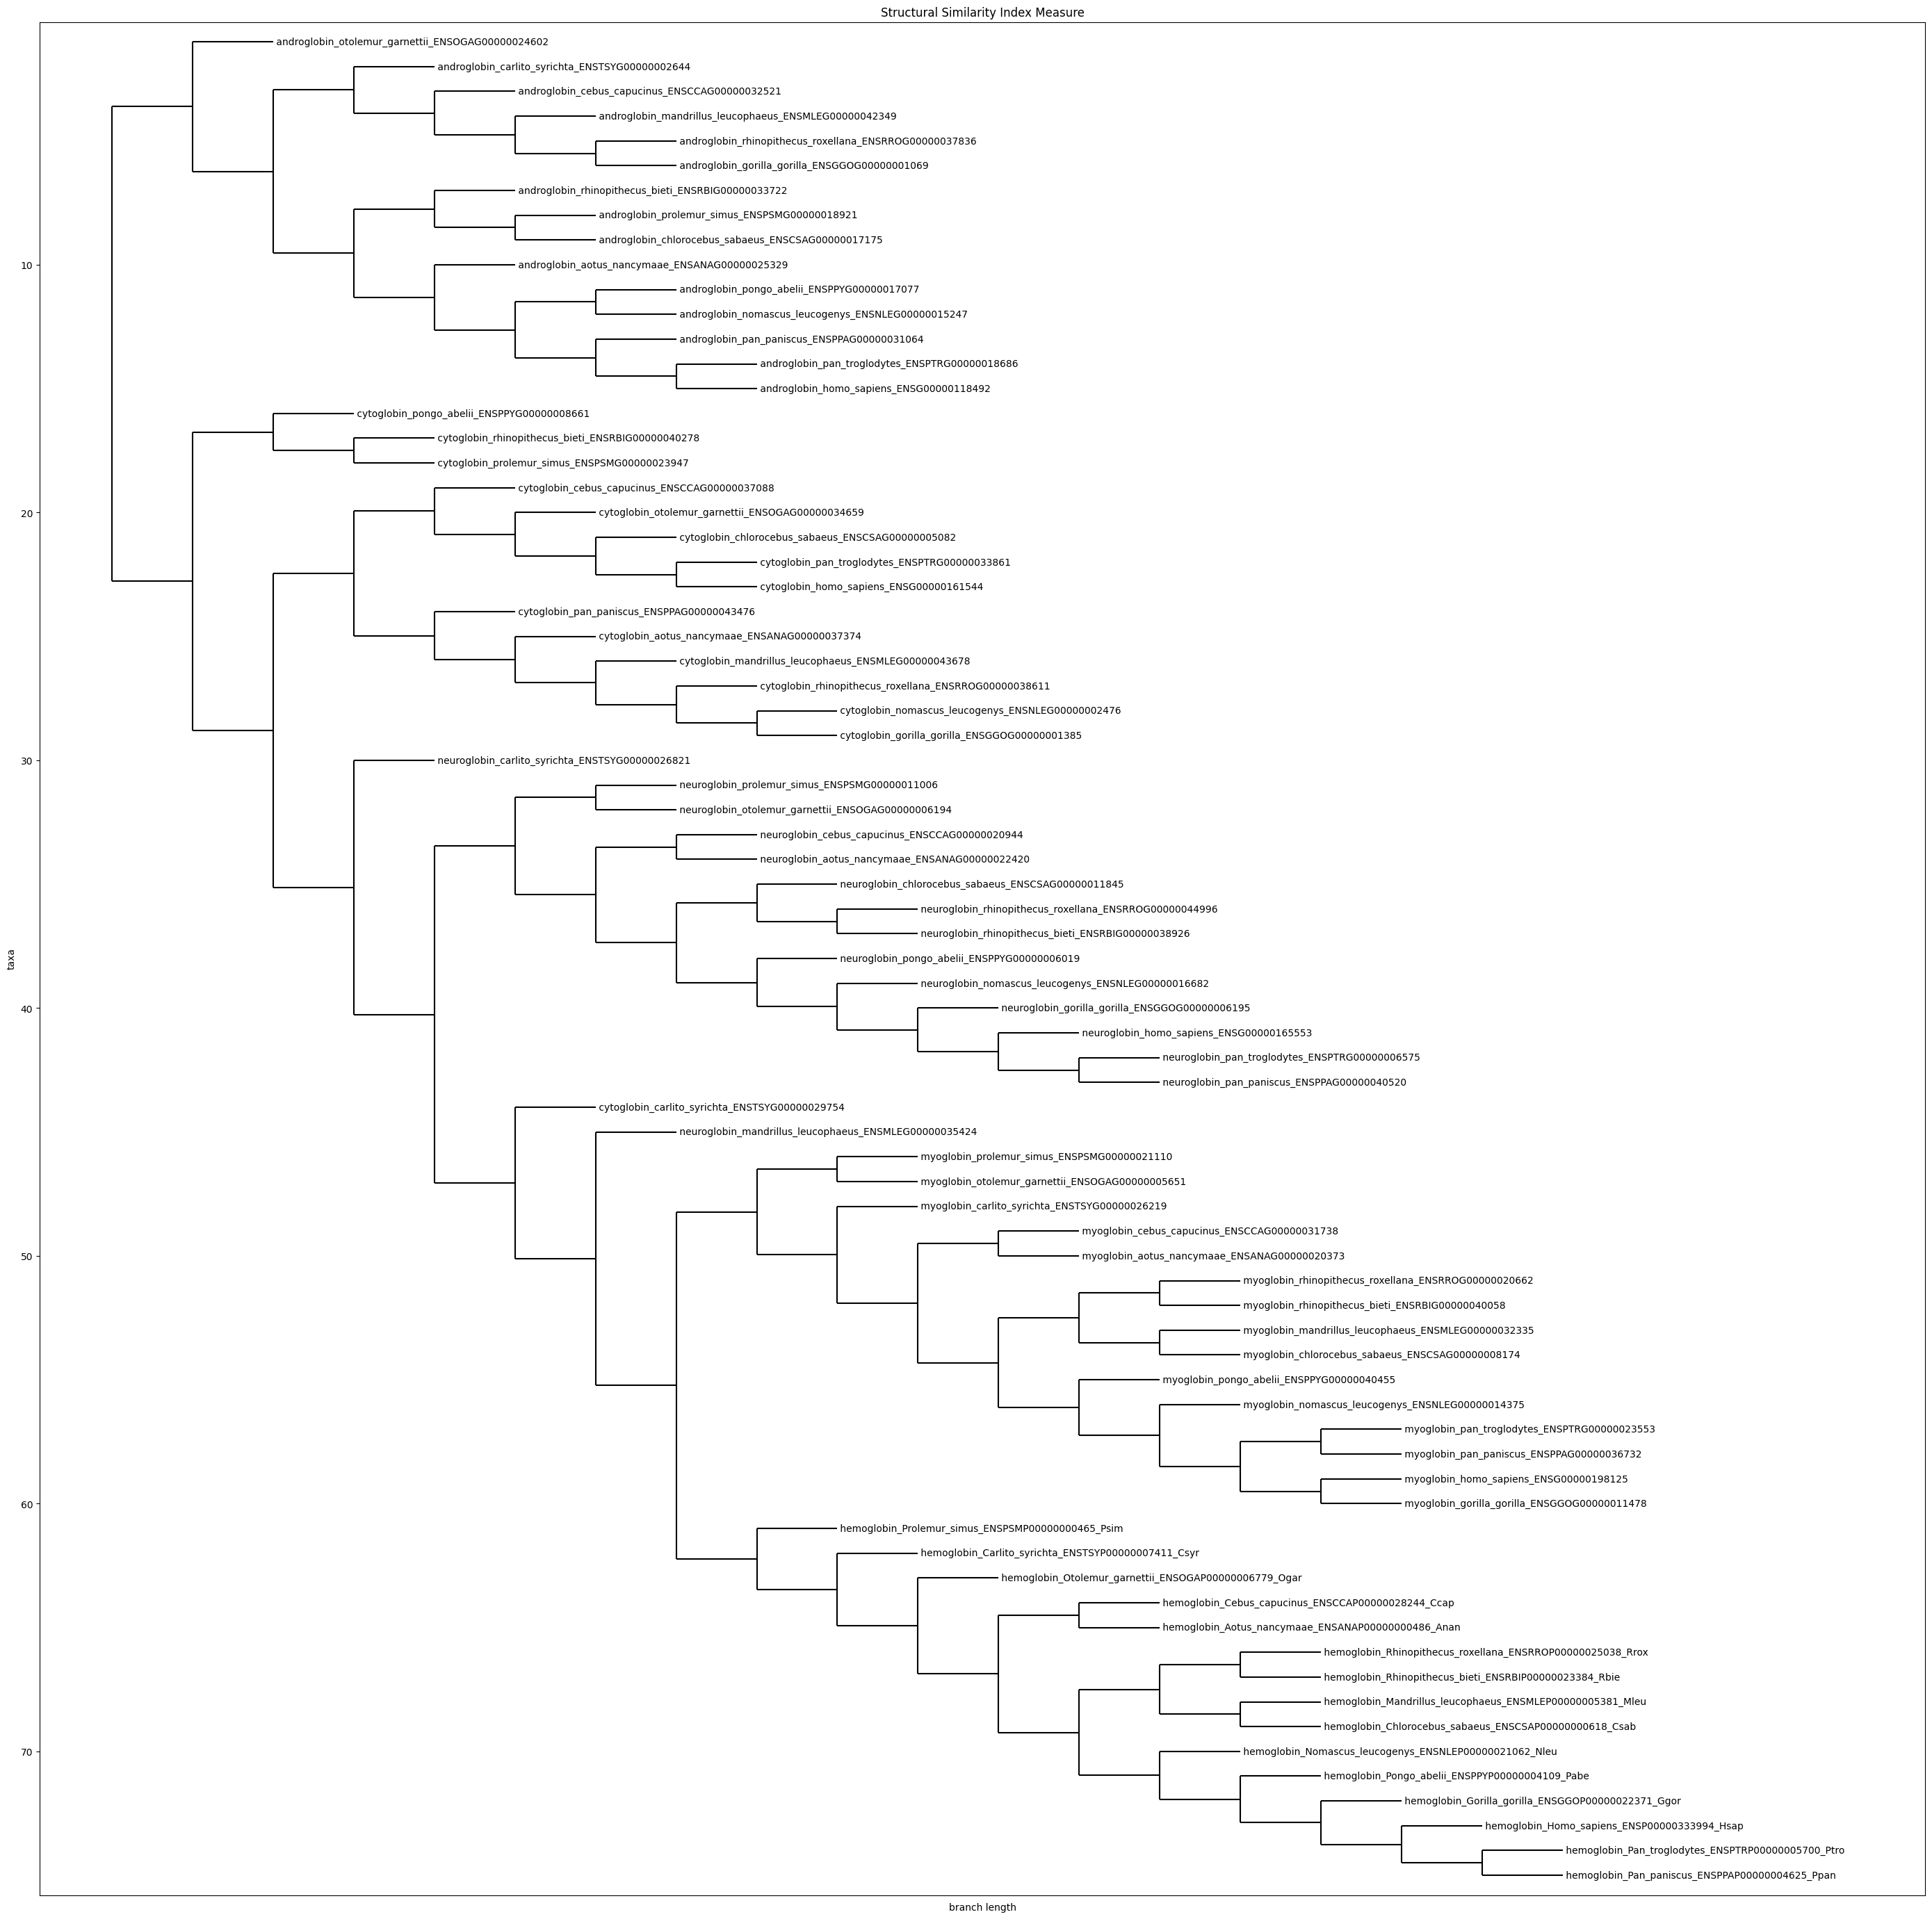

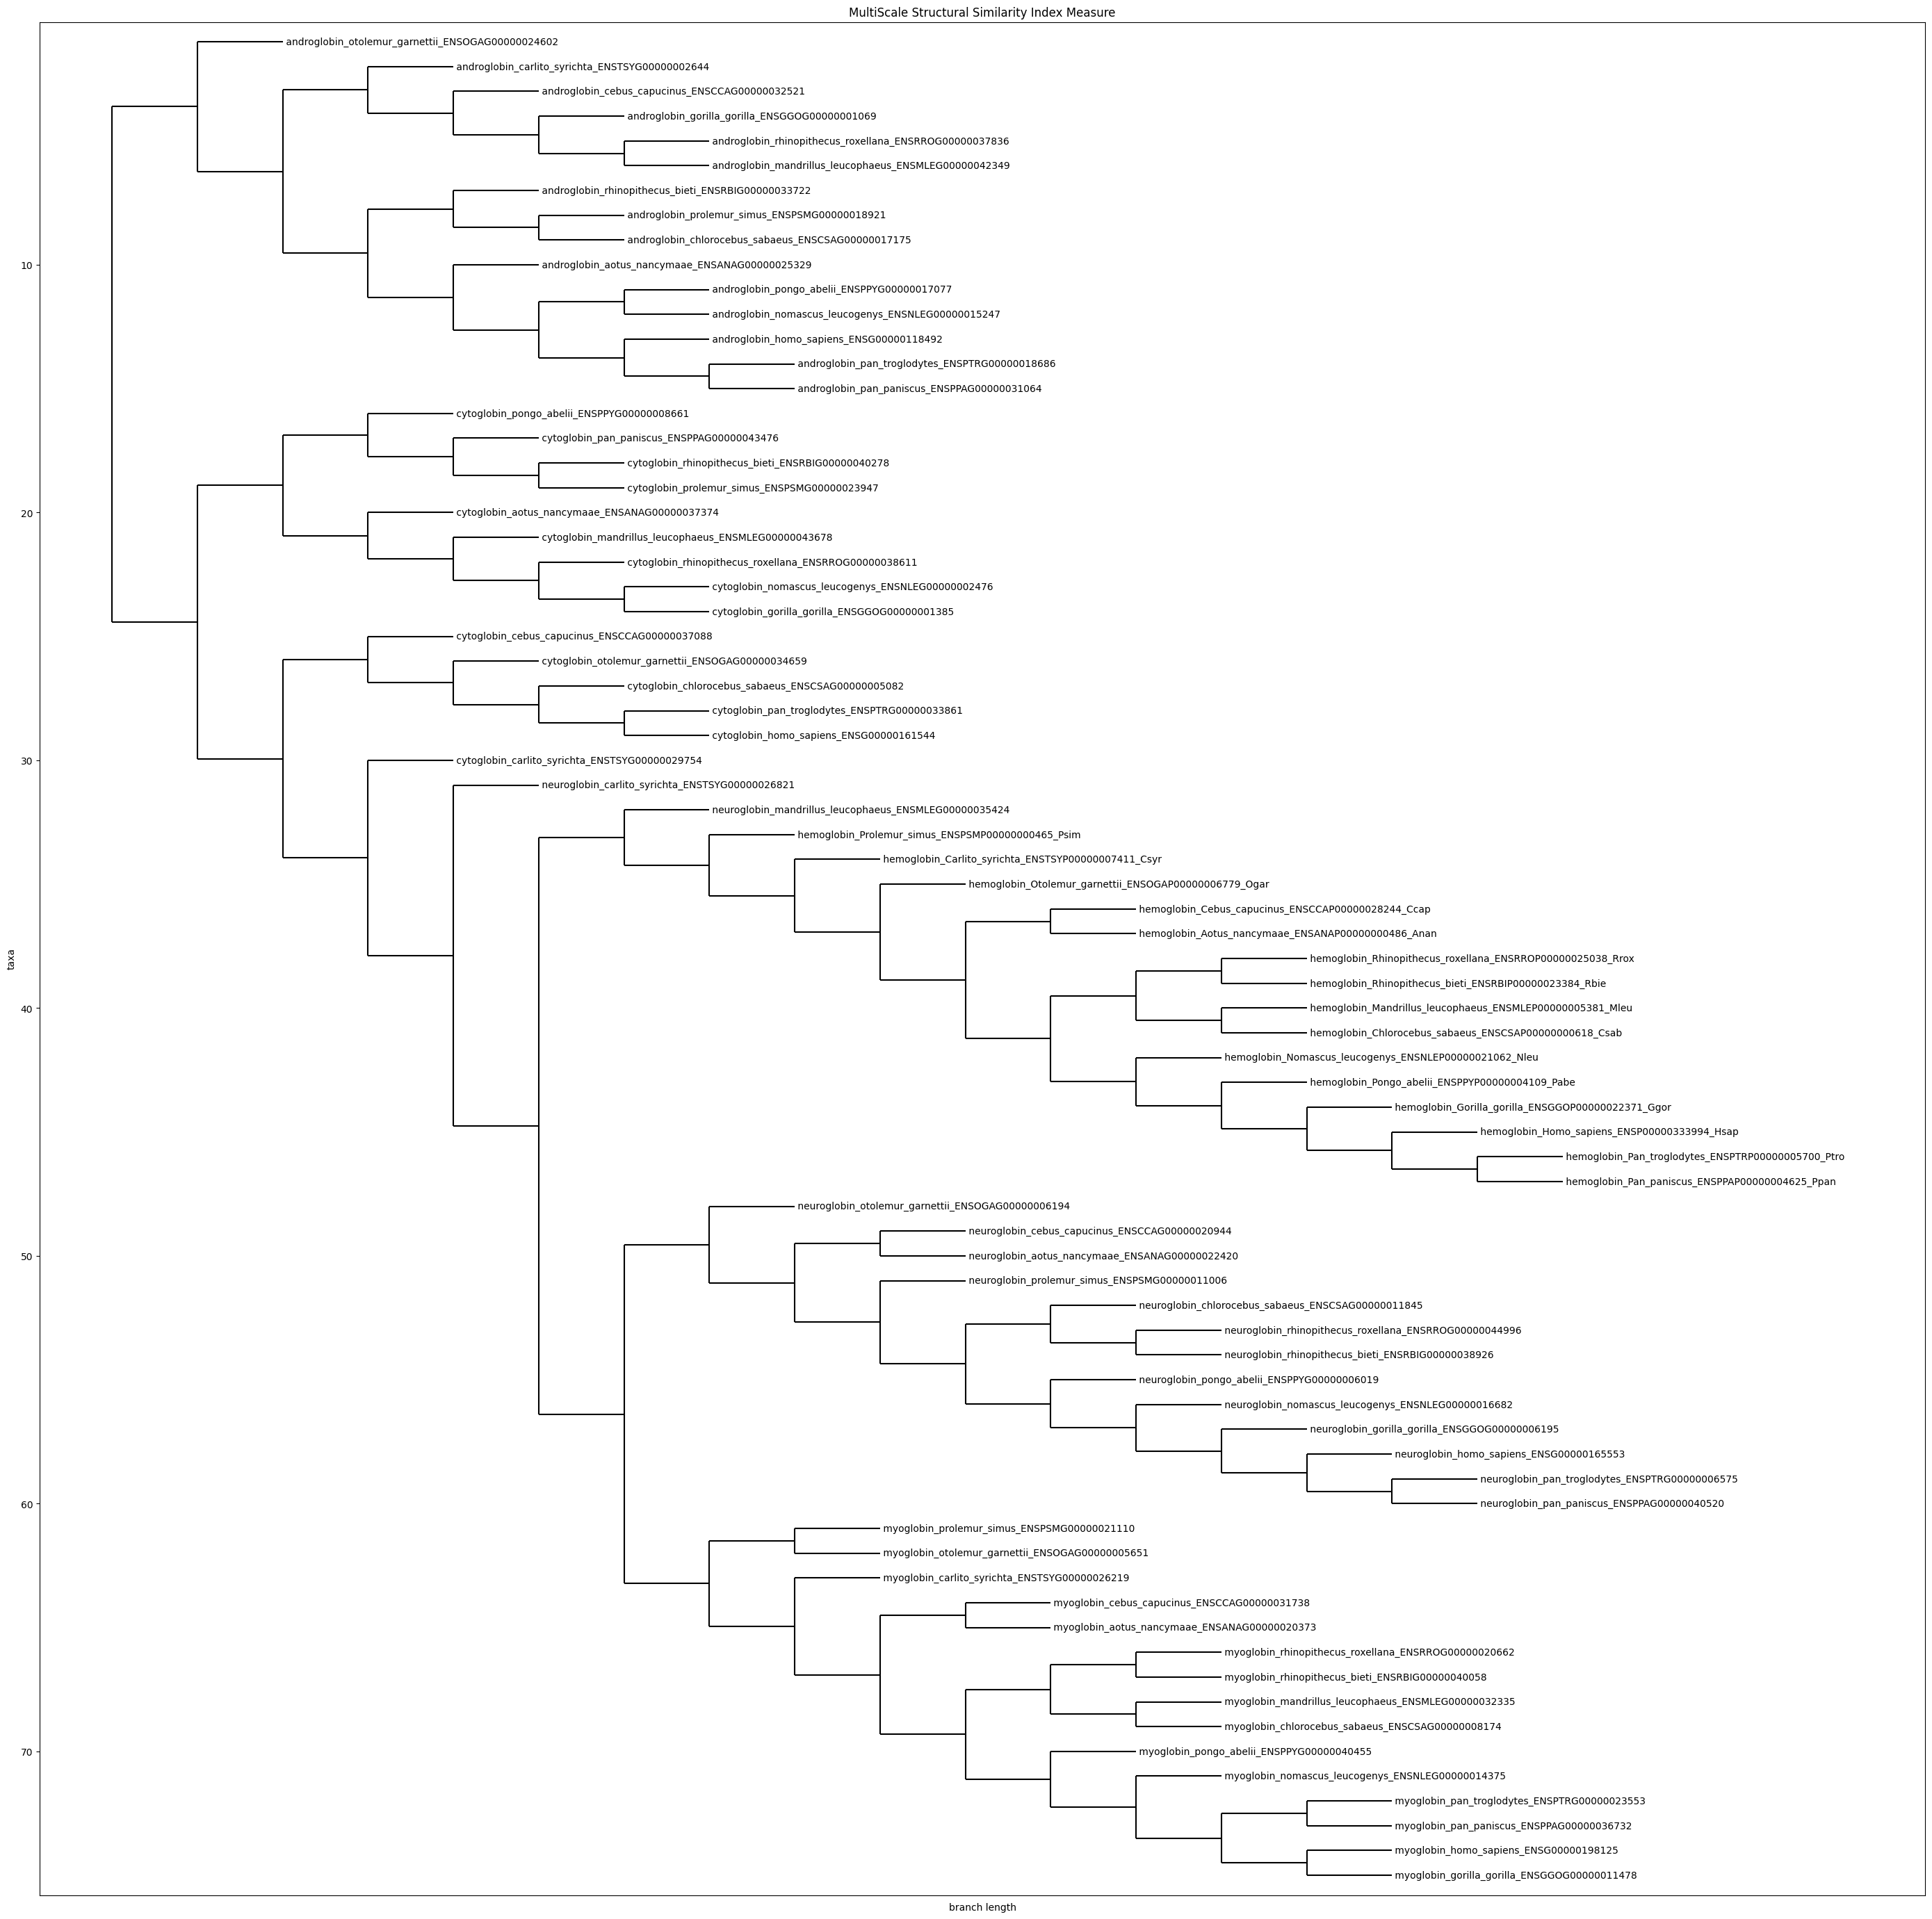

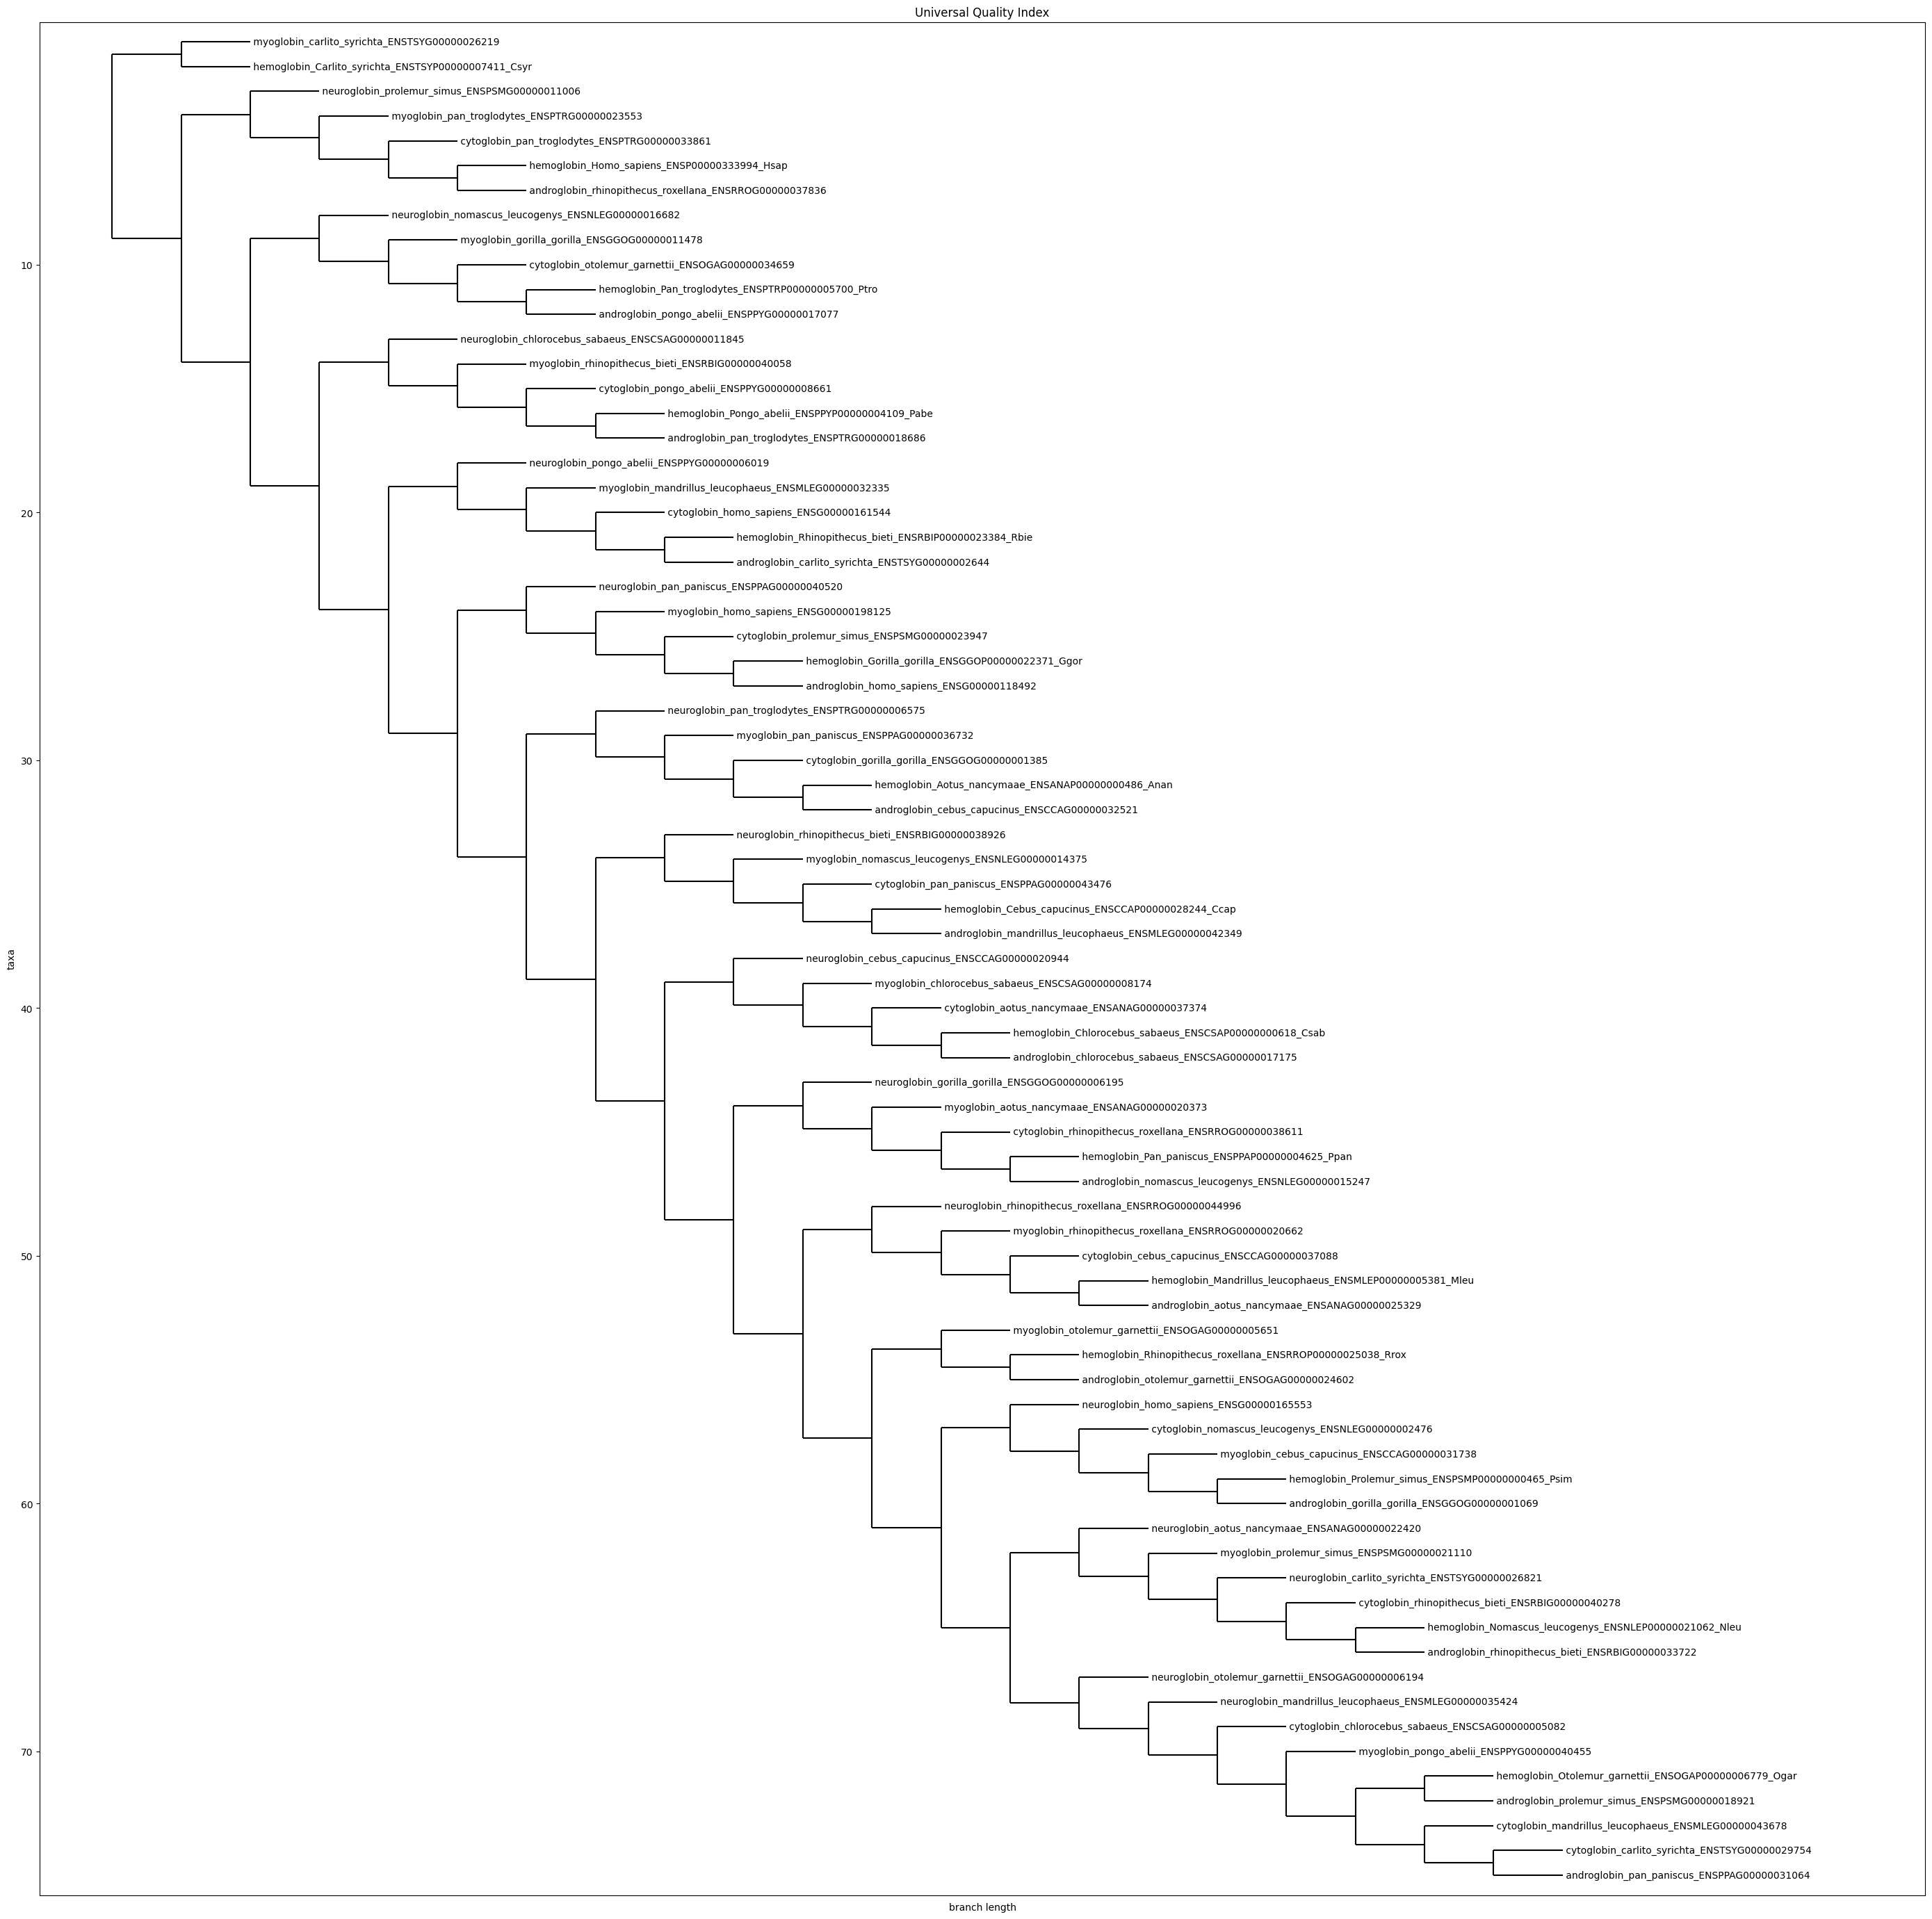

In [12]:
for alg, numpy_all in numpys_all.items():
    tree = upgma(1-numpy_all)
    fig, ax = pyplot.subplots(1, 1, figsize=(35, 35))
    newick = tree.to_newick(include_distance=False)
    t = Phylo.read(StringIO(newick), "newick")
    t.ladderize()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_title(alg)
    Phylo.draw(
        t,
        show_confidence=False,
        axes=ax,
        do_show=False,
        label_func=lambda clade: "" if not clade.name else list(fixed_dfs_all[alg].columns)[int(clade.name)],
        branch_labels=lambda clade: "" if not clade.name else "{:.2f}".format(
            clade.confidence) if clade.confidence else ""
    )
    pyplot.show()

In [13]:
for alg, fixed_df_all in fixed_dfs_all.items():
    k=14
    by_homologues = {}
    only_homologues = {}
    for column in fixed_df_all.columns:
        if column.split("_")[0] in by_homologues:
            by_homologues[column.split("_")[0]] += list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[column.split("_")[0]] += [i.split("_")[0] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]
        else:
            by_homologues[column.split("_")[0]] = list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[column.split("_")[0]] = [i.split("_")[0] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]

    #Precision
    print(f"--------{alg}--------")
    for h in only_homologues:
        print(h)
        print(sum([i==h for i in only_homologues[h]])/len(only_homologues[h]))

--------Structural Similarity Index Measure--------
androglobin
1.0
cytoglobin
0.40476190476190477
hemoglobin
1.0
myoglobin
1.0
neuroglobin
0.7428571428571429
--------MultiScale Structural Similarity Index Measure--------
androglobin
1.0
cytoglobin
0.5952380952380952
hemoglobin
1.0
myoglobin
1.0
neuroglobin
0.7619047619047619
--------Universal Quality Index--------
androglobin
0.0
cytoglobin
0.0
hemoglobin
0.0
myoglobin
0.0
neuroglobin
0.0


In [14]:
for alg, fixed_df_all in fixed_dfs_all.items():
    print(f"--------{alg}--------")
    display(fixed_df_all.describe())

--------Structural Similarity Index Measure--------


,androglobin_aotus_nancymaae_ENSANAG00000025329,androglobin_carlito_syrichta_ENSTSYG00000002644,androglobin_cebus_capucinus_ENSCCAG00000032521,androglobin_chlorocebus_sabaeus_ENSCSAG00000017175,androglobin_gorilla_gorilla_ENSGGOG00000001069,androglobin_homo_sapiens_ENSG00000118492,androglobin_mandrillus_leucophaeus_ENSMLEG00000042349,androglobin_nomascus_leucogenys_ENSNLEG00000015247,androglobin_otolemur_garnettii_ENSOGAG00000024602,androglobin_pan_paniscus_ENSPPAG00000031064,...,neuroglobin_homo_sapiens_ENSG00000165553,neuroglobin_mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin_nomascus_leucogenys_ENSNLEG00000016682,neuroglobin_otolemur_garnettii_ENSOGAG00000006194,neuroglobin_pan_paniscus_ENSPPAG00000040520,neuroglobin_pan_troglodytes_ENSPTRG00000006575,neuroglobin_pongo_abelii_ENSPPYG00000006019,neuroglobin_prolemur_simus_ENSPSMG00000011006,neuroglobin_rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin_rhinopithecus_roxellana_ENSRROG00000044996
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.184603,0.184164,0.184353,0.184405,0.197510,0.196318,0.198032,0.190405,0.203295,0.196348,...,0.330315,0.217124,0.329967,0.314143,0.329865,0.329865,0.326726,0.317569,0.325913,0.325913
std,0.021485,0.020392,0.020836,0.020157,0.090629,0.082426,0.090558,0.060809,0.009031,0.082443,...,0.264720,0.021585,0.263235,0.228937,0.262857,0.262857,0.253329,0.238321,0.255118,0.255118
min,0.170860,0.170884,0.170549,0.171096,0.170729,0.170950,0.171246,0.170680,0.192175,0.170952,...,0.174646,0.173142,0.174974,0.173561,0.174796,0.174796,0.175876,0.174517,0.175490,0.175490
25%,0.172506,0.172296,0.172119,0.172777,0.172277,0.172536,0.172761,0.172231,0.195896,0.172563,...,0.221963,0.221618,0.221996,0.221375,0.222576,0.222576,0.223527,0.220447,0.221992,0.221992
50%,0.175547,0.175252,0.175898,0.176222,0.175410,0.174800,0.176008,0.175250,0.200886,0.174796,...,0.225904,0.225223,0.226350,0.226175,0.226631,0.226631,0.227352,0.224829,0.225568,0.225568
75%,0.178311,0.179246,0.179546,0.178839,0.179157,0.177957,0.179645,0.178063,0.209432,0.177944,...,0.232697,0.230813,0.233111,0.230712,0.232812,0.232812,0.234261,0.230027,0.232382,0.232382
max,0.238193,0.228709,0.234651,0.240826,0.725758,0.672703,0.725758,0.675134,0.220052,0.672703,...,0.992484,0.233881,0.981424,0.873257,1.000000,1.000000,0.951298,0.873257,1.000000,1.000000


--------MultiScale Structural Similarity Index Measure--------


,androglobin_aotus_nancymaae_ENSANAG00000025329,androglobin_carlito_syrichta_ENSTSYG00000002644,androglobin_cebus_capucinus_ENSCCAG00000032521,androglobin_chlorocebus_sabaeus_ENSCSAG00000017175,androglobin_gorilla_gorilla_ENSGGOG00000001069,androglobin_homo_sapiens_ENSG00000118492,androglobin_mandrillus_leucophaeus_ENSMLEG00000042349,androglobin_nomascus_leucogenys_ENSNLEG00000015247,androglobin_otolemur_garnettii_ENSOGAG00000024602,androglobin_pan_paniscus_ENSPPAG00000031064,...,neuroglobin_homo_sapiens_ENSG00000165553,neuroglobin_mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin_nomascus_leucogenys_ENSNLEG00000016682,neuroglobin_otolemur_garnettii_ENSOGAG00000006194,neuroglobin_pan_paniscus_ENSPPAG00000040520,neuroglobin_pan_troglodytes_ENSPTRG00000006575,neuroglobin_pongo_abelii_ENSPPYG00000006019,neuroglobin_prolemur_simus_ENSPSMG00000011006,neuroglobin_rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin_rhinopithecus_roxellana_ENSRROG00000044996
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.551893,0.545229,0.548378,0.549033,0.556277,0.558983,0.557767,0.553339,0.535175,0.560066,...,0.674243,0.620656,0.674152,0.668687,0.674694,0.674694,0.674485,0.665985,0.671880,0.671880
std,0.042965,0.041590,0.042411,0.041766,0.078216,0.080891,0.078987,0.058289,0.017685,0.081083,...,0.142366,0.049881,0.141854,0.129294,0.141520,0.141520,0.137532,0.134762,0.139878,0.139878
min,0.517351,0.512325,0.514342,0.515079,0.514947,0.514531,0.515612,0.515609,0.517091,0.515418,...,0.521268,0.522230,0.521542,0.522461,0.522204,0.522204,0.523733,0.518076,0.521849,0.521849
25%,0.528149,0.521849,0.524712,0.525808,0.524239,0.526538,0.525717,0.526492,0.523638,0.527552,...,0.603925,0.595478,0.603987,0.604077,0.604633,0.604633,0.605492,0.597956,0.603081,0.603081
50%,0.535474,0.528698,0.531426,0.532620,0.531317,0.533480,0.532527,0.533224,0.527745,0.534537,...,0.658002,0.651929,0.658068,0.658231,0.659097,0.659097,0.660757,0.652474,0.654687,0.654687
75%,0.539810,0.533098,0.536224,0.536954,0.535735,0.537616,0.537107,0.537520,0.534532,0.538682,...,0.662601,0.657635,0.662859,0.662019,0.663382,0.663382,0.664742,0.656565,0.661428,0.661428
max,0.658229,0.639008,0.649563,0.662845,0.962257,0.977476,0.974971,0.899618,0.572788,0.981728,...,0.997369,0.662154,0.995386,0.950733,1.000000,1.000000,0.981461,0.954454,1.000000,1.000000


--------Universal Quality Index--------


,androglobin_aotus_nancymaae_ENSANAG00000025329,androglobin_carlito_syrichta_ENSTSYG00000002644,androglobin_cebus_capucinus_ENSCCAG00000032521,androglobin_chlorocebus_sabaeus_ENSCSAG00000017175,androglobin_gorilla_gorilla_ENSGGOG00000001069,androglobin_homo_sapiens_ENSG00000118492,androglobin_mandrillus_leucophaeus_ENSMLEG00000042349,androglobin_nomascus_leucogenys_ENSNLEG00000015247,androglobin_otolemur_garnettii_ENSOGAG00000024602,androglobin_pan_paniscus_ENSPPAG00000031064,...,neuroglobin_homo_sapiens_ENSG00000165553,neuroglobin_mandrillus_leucophaeus_ENSMLEG00000035424,neuroglobin_nomascus_leucogenys_ENSNLEG00000016682,neuroglobin_otolemur_garnettii_ENSOGAG00000006194,neuroglobin_pan_paniscus_ENSPPAG00000040520,neuroglobin_pan_troglodytes_ENSPTRG00000006575,neuroglobin_pongo_abelii_ENSPPYG00000006019,neuroglobin_prolemur_simus_ENSPSMG00000011006,neuroglobin_rhinopithecus_bieti_ENSRBIG00000038926,neuroglobin_rhinopithecus_roxellana_ENSRROG00000044996
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.857968,0.857298,0.857473,0.858388,0.838984,0.837398,0.838370,0.850826,0.839467,0.836995,...,0.685711,0.802156,0.686030,0.703095,0.686602,0.686602,0.690350,0.697266,0.691061,0.691061
std,0.028892,0.027315,0.027992,0.027806,0.125282,0.138092,0.129308,0.073947,0.010079,0.140243,...,0.272137,0.034932,0.270684,0.235120,0.270398,0.270398,0.260616,0.244401,0.262301,0.262301
min,0.788076,0.797577,0.791861,0.787633,0.104697,0.029372,0.055627,0.270043,0.821126,0.004701,...,0.007804,0.779022,0.018509,0.130856,0.000000,0.000000,0.050777,0.130856,0.000000,0.000000
25%,0.866565,0.864335,0.864999,0.866282,0.865159,0.866841,0.865058,0.866496,0.834848,0.866837,...,0.778013,0.781725,0.777542,0.780707,0.778419,0.778419,0.777716,0.778959,0.778938,0.778938
50%,0.869063,0.867934,0.868124,0.869106,0.868117,0.869423,0.868213,0.868995,0.839669,0.869389,...,0.782842,0.783455,0.782356,0.784193,0.782643,0.782643,0.782183,0.781579,0.783831,0.783831
75%,0.874539,0.873457,0.873999,0.874532,0.873793,0.874596,0.873953,0.874603,0.847416,0.874584,...,0.791245,0.796678,0.791326,0.791905,0.791705,0.791705,0.791105,0.790828,0.792023,0.792023
max,0.877750,0.876512,0.877095,0.877613,0.876854,0.877735,0.876868,0.877689,0.855940,0.877707,...,0.868462,0.872235,0.868337,0.869429,0.868616,0.868616,0.868231,0.868239,0.869417,0.869417
